In [2]:
import pandas as pd
import numpy as np

In [48]:
startup = pd.read_csv("50_Startups.csv")

In [31]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
startup.shape

(50, 5)

In [33]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [34]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [35]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [36]:
startup.duplicated().sum()

0

In [37]:
import seaborn as sns

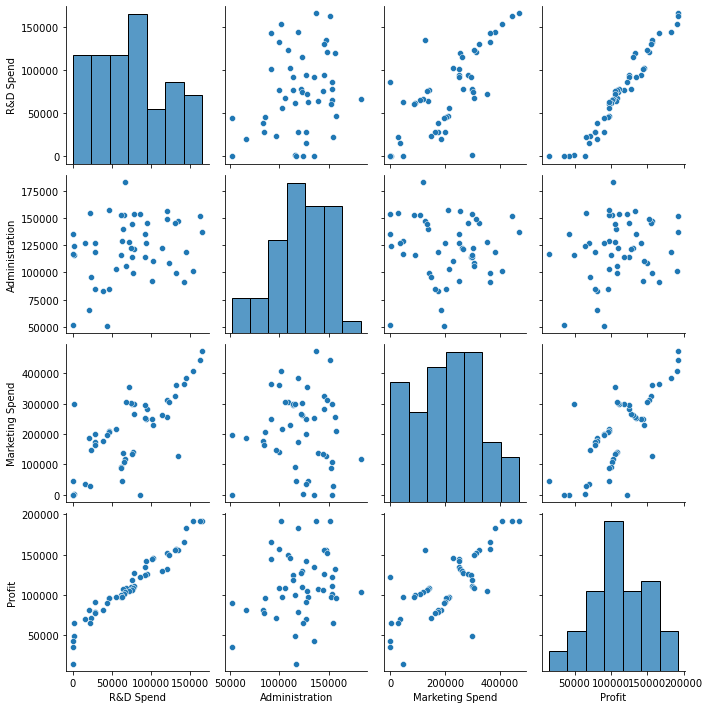

In [11]:
sns.pairplot(startup)

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [49]:
label = LabelEncoder()
startup["State"]=label.fit_transform(startup["State"])
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [50]:
startup = startup.rename({'R&D Spend':'RD',
                                 'Administration':'Admin',
                                 'Marketing Spend':'Marketing',
                                 'State':'State',
                                 'Profit':'Profit'},axis=1)

In [51]:
startup.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [18]:
import statsmodels.formula.api as smf

In [53]:
model_1 = smf.ols('Profit~RD+Admin+Marketing+State',data=startup).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           8.51e-29
Time:                        12:23:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RD             0.8058      0.046     17.609      0.000       0.714       0.898
Admin         -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing      0.0272      0.017      1.637      0.109      -0.006       0.061
State        -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model_admin=smf.ols('Profit~Admin',data=startup).fit()
model_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.162
Time:                        12:25:55   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
model_marketing=smf.ols('Profit~Marketing',data=startup).fit()
model_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        12:26:42   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
model_state=smf.ols('Profit~State',data=startup).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Tue, 01 Jun 2021   Prob (F-statistic):              0.482
Time:                        12:27:09   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model_state_mark_admin=smf.ols('Profit~State+Marketing+Admin',data=startup).fit()
model_state_mark_admin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     24.12
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.58e-09
Time:                        12:28:10   Log-Likelihood:                -577.03
No. Observations:                  50   AIC:                             1162.
Df Residuals:                      46   BIC:                             1170.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.858e+04   1.82e+04      1.019      0.314   -1.81e+04    5.53e+04
State       1971.5065   4461.459      0.442      0.661   -7008.944     1.1e+04
Marketing      0.2478      0.030      8.150      0.000       0.187       0.309
Admin          0.3228      0.132      2.440      0.019       0.057       0.589
==============================================================================
Omnibus:                        6.485   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                6.530
Skew:                          -0.490   Prob(JB):                       0.0382
Kurtosis:                       4.474   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model_2 = smf.ols('Profit~RD+Admin+Marketing',data=startup).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        12:28:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
startup_1=startup.astype(int)
startup_1.head()

,RD,Admin,Marketing,State,Profit
0,165349,136897,471784,2,192261
1,162597,151377,443898,0,191792
2,153441,101145,407934,1,191050
3,144372,118671,383199,2,182901
4,142107,91391,366168,1,166187


In [70]:
# VIF = 1/1-Rsquared

rsqr_rd = smf.ols('RD~State+Admin+Marketing',data=startup).fit().rsquared
vif_rd = 1/(1-rsqr_rd)

rsqr_admin = smf.ols('Admin~State+RD+Marketing',data=startup).fit().rsquared
vif_admin = 1/(1-rsqr_admin)

rsqr_marketing = smf.ols('Marketing~State+RD+Admin',data=startup).fit().rsquared
vif_marketing = 1/(1-rsqr_marketing)

rsqr_state = smf.ols('State~Marketing+RD+Admin',data=startup).fit().rsquared
vif_state = 1/(1-rsqr_state)

In [72]:
vif = {"names":['RD','Admin','Marketing','State'],
      "VIF":[vif_rd,vif_admin,vif_marketing,vif_state]}

data_vif=pd.DataFrame(vif)

In [73]:
data_vif

,names,VIF
0,RD,2.481178
1,Admin,1.175315
2,Marketing,2.326780
3,State,1.011281


In [76]:
#QQplot
import matplotlib.pyplot as plt
import statsmodels.api as sm


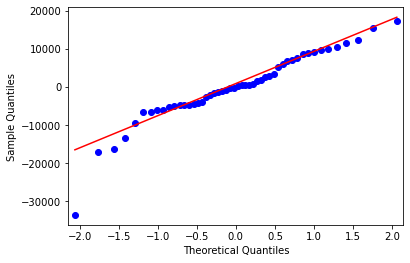

In [77]:
qqplot=sm.qqplot(model_1.resid,line='q')
plt.show()

In [82]:

list(np.where(model_1.resid<-20000))

[array([49])]

In [83]:
# residual plot for homoscadaticity 

def get_standarddized_values(vals):
    return (vals - vals.mean()/vals.std())

Text(0, 0.5, 'standarddized residuals')

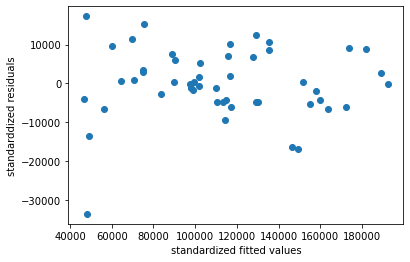

In [84]:
plt.scatter(get_standarddized_values(model_1.fittedvalues),get_standarddized_values(model_1.resid))
plt.xlabel("standardized fitted values")
plt.ylabel("standarddized residuals")

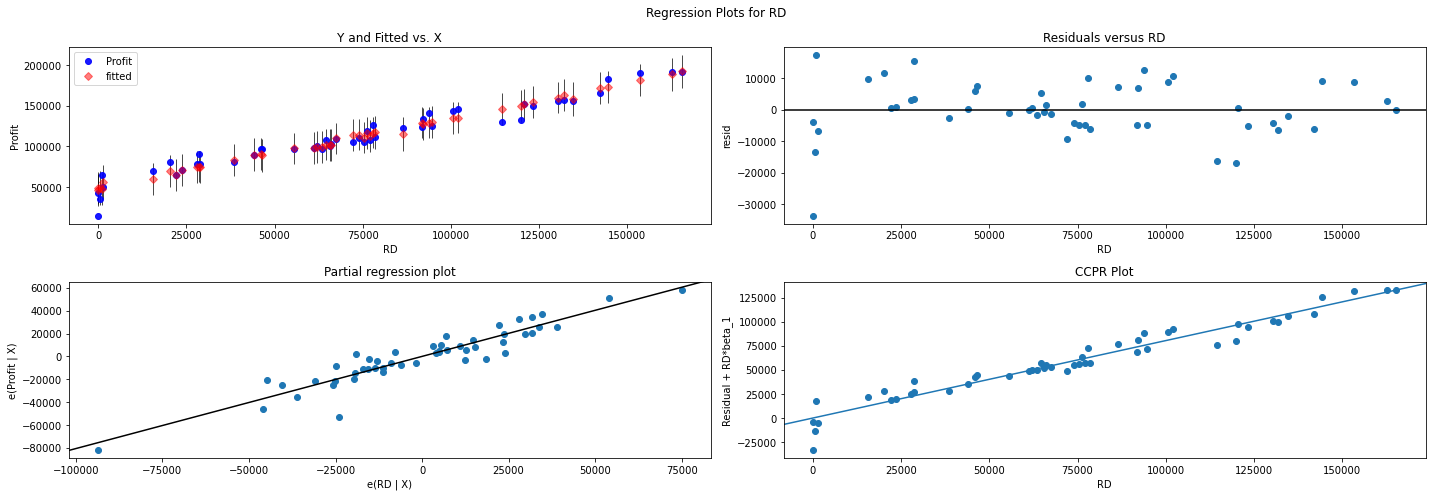

In [85]:
# residual vs regressors

fig = plt.figure(figsize=(20,7))
fig = sm.graphics.plot_regress_exog(model_1,'RD',fig=fig)

In [91]:
#cooks distance

model_influence = model_1.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

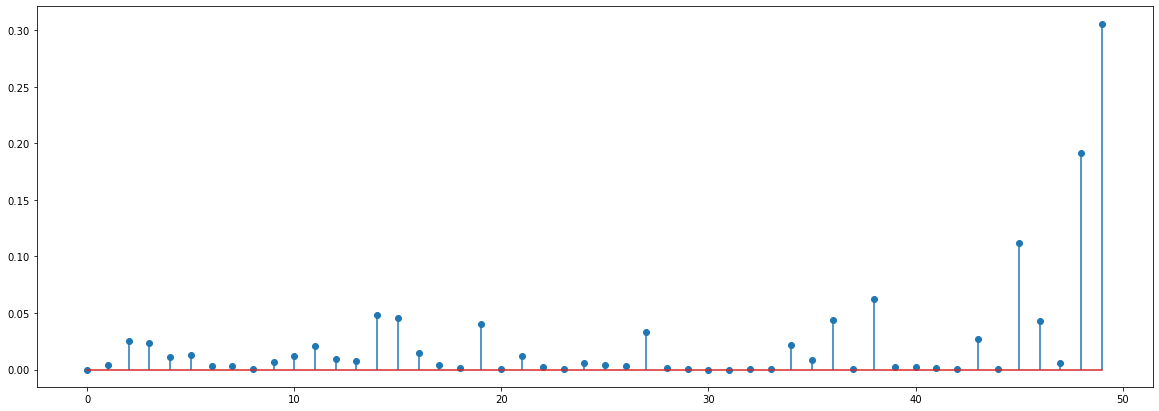

In [94]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(startup)),np.round(c,4))

In [95]:
np.argmax(c), np.max(c)

(49, 0.3060281954699332)

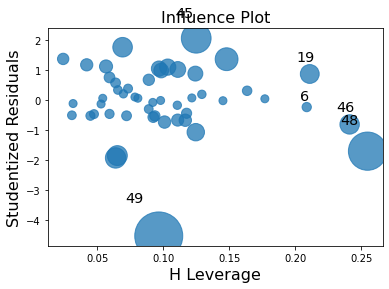

In [97]:
# influenceplot

from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model_1)
plt.show()

In [98]:
startup[startup.index.isin([49])]

,RD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [99]:
startup.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [101]:
startup_2 = startup.drop(startup.index[[49]],axis=0).reset_index()


In [102]:
model_1_1=smf.ols('Profit~RD+Admin+Marketing+State',data=startup_2).fit()
model_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.45e-30
Time:                        13:20:52   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
RD             0.7844      0.039     20.367      0.000       0.707       0.862
Admin         -0.0225      0.043     -0.522      0.604      -0.109       0.064
Marketing      0.0252      0.014      1.811      0.077      -0.003       0.053
State       -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
# standardised model

std = StandardScaler()
startup_3=std.fit_transform(startup)
startup_3=pd.DataFrame(startup_3)

In [107]:
startup_3.head()

,0,1,2,3,4
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [108]:
startup_3.columns = ['Rd','Admin','Marekting','State','Profit']
startup_3.head()

,Rd,Admin,Marekting,State,Profit
0,2.016411,0.560753,2.153943,1.212678,2.011203
1,1.955860,1.082807,1.923600,-1.212678,1.999430
2,1.754364,-0.728257,1.626528,0.000000,1.980842
3,1.554784,-0.096365,1.422210,1.212678,1.776627
4,1.504937,-1.079919,1.281528,0.000000,1.357740


In [110]:
model_1_std=smf.ols('Profit~Rd+Admin+Marekting+State',data=startup_3).fit()
model_1_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           8.51e-29
Time:                        13:29:07   Log-Likelihood:                 4.3223
No. Observations:                  50   AIC:                             1.355
Df Residuals:                      45   BIC:                             10.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.57e-14      1.000      -0.067       0.067
Rd             0.9176      0.052     17.609      0.000       0.813       1.023
Admin         -0.0186      0.036     -0.520      0.606      -0.091       0.054
Marekting      0.0826      0.050      1.637      0.109      -0.019       0.184
State         -0.0005      0.033     -0.014      0.989      -0.067       0.067
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
model_rd_mark=smf.ols('Profit~RD+Marketing',data=startup_2).fit()
model_rd_mark.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           3.74e-33
Time:                        13:33:54   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RD             0.7754      0.035     22.136      0.000       0.705       0.846
Marketing      0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

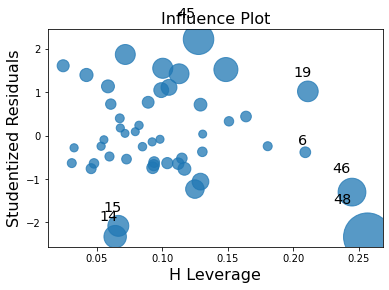

In [114]:
influence_plot(model_1_1)
plt.show()

In [116]:
startup_4=startup_2.drop(startup.index[[48]],axis=0).reset_index()

In [117]:
model_1_2=smf.ols('Profit~RD+Admin+Marketing+State',data=startup_4).fit()
model_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           4.18e-30
Time:                        13:38:04   Log-Likelihood:                -493.30
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.927e+04   6021.622      9.843      0.000    4.71e+04    7.14e+04
RD             0.7898      0.037     21.480      0.000       0.716       0.864
Admin         -0.0626      0.045     -1.406      0.167      -0.152       0.027
Marketing      0.0171      0.014      1.245      0.220      -0.011       0.045
State       -326.7063   1325.527     -0.246      0.806   -2999.886    2346.473
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.517
Skew:                           0.081   Prob(JB):                        0.772
Kurtosis:                       2.518   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

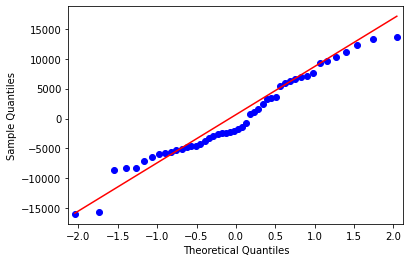

In [118]:
qqplot=sm.qqplot(model_1_2.resid,line='q')
plt.show()

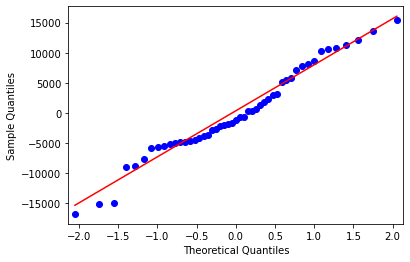

In [119]:
qqplot=sm.qqplot(model_1_1.resid,line='q')
plt.show()

In [124]:
startup_2.iloc[:,:5]

,index,RD,Admin,Marketing,State
0,0,165349.20,136897.80,471784.10,2
1,1,162597.70,151377.59,443898.53,0
2,2,153441.51,101145.55,407934.54,1
3,3,144372.41,118671.85,383199.62,2
4,4,142107.34,91391.77,366168.42,1
5,5,131876.90,99814.71,362861.36,2
6,6,134615.46,147198.87,127716.82,0
7,7,130298.13,145530.06,323876.68,1
8,8,120542.52,148718.95,311613.29,2
9,9,123334.88,108679.17,304981.62,0


In [125]:
# prediction

predict = model_1_1.predict(startup_2.iloc[:,:5])

In [126]:
predict.head()

0    189868.789012
1    188621.975818
2    180696.388117
3    171596.047134
4    170974.613858
dtype: float64

In [129]:
profit=startup_2["Profit"]
profit.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [130]:
from ml_metrics import rmse
rmse(predict,profit)

7388.086949398372

In [134]:
predict_1 = model_1_2.predict(startup_2.iloc[:,:5])

In [132]:
rmse(predict_1,profit)

7530.37615592153

In [ ]:
# model_1_1 is good.